# Drill: Present the same data multiple ways

Find a dataset you'd like to explore. This can be something you're familiar with or something new. Create a Jupyter notebook and then:

### Drills

* Choose one variable and plot that variable four different ways.
* Choose two continuous variables, and plot them three different ways.
* Choose one continuous variable and one categorical variable, and plot them six different ways.

Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like.

### Challenge

As an optional challenge, find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:

* Probability distributions
* Bivariate relationships
* Whether the distributions or the relationships vary across groups

Accompany your plot with a written description of what you see.

I am using the Titanic dataset which I downloaded a long while ago, but never actually reviewed.  I know I downloaded it from Kaggle, but not sure which of the multitude of Titanic datasets I actually downloaded.  Since this is a drill, it is not as important as accomplishing the required tasks.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
#plt.style.use('classic')
%matplotlib inline

In [2]:
# Pulled a dataset from seaborn to play with.
titanic = pd.read_csv('titanic.csv', index_col=None)

titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


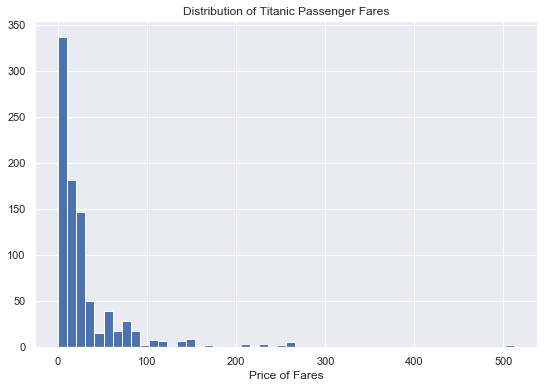

In [3]:
# Choose one variable and plot variable 4 different ways. 
# Variable => Fares
# 1st of 4 single variable plots
plt.figure(figsize=(9,6))
plt.hist(x=titanic.fare, bins=50)
plt.title('Distribution of Titanic Passenger Fares')
plt.xlabel('Price of Fares')
plt.show()

Histogram is a good way to show the spread of a particular variable and in this histogram you can see more tickets were purchased for lower prices than the higher and we have an outlier at around the $500 fare.  However it is difficult to see this way and would be easier to see in a different type of plot.

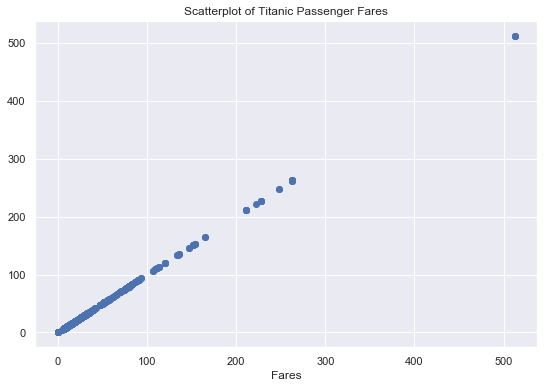

In [4]:
# 2nd of 4 single variable plots
plt.figure(figsize=(9,6))
plt.scatter(x=titanic.fare, y=titanic.fare)
plt.title("Scatterplot of Titanic Passenger Fares")
plt.xlabel("Fares")
plt.ylabel("")
plt.show()

Scatterplots are great for showing relationships between variables and not a good use for one variable.  Though you are able to see the outlier easily.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


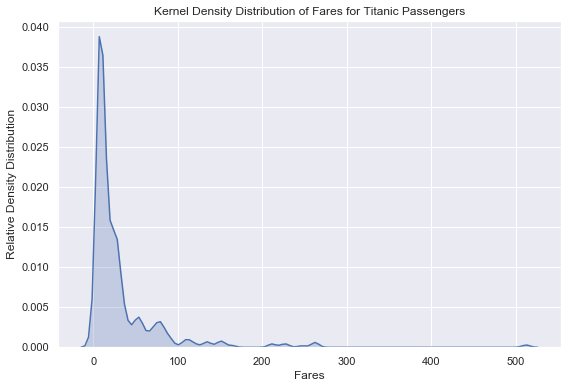

In [5]:
# 3rd of 4 single variable plots
plt.figure(figsize=(9,6))
sns.kdeplot(data=titanic.fare, 
            shade=True, legend=False)
plt.title("Kernel Density Distribution of Fares for Titanic Passengers")
plt.xlabel("Fares")
plt.ylabel("Relative Density Distribution")
plt.show()

This is similar to the histogram with the same issue of having problem seeing the outlier.

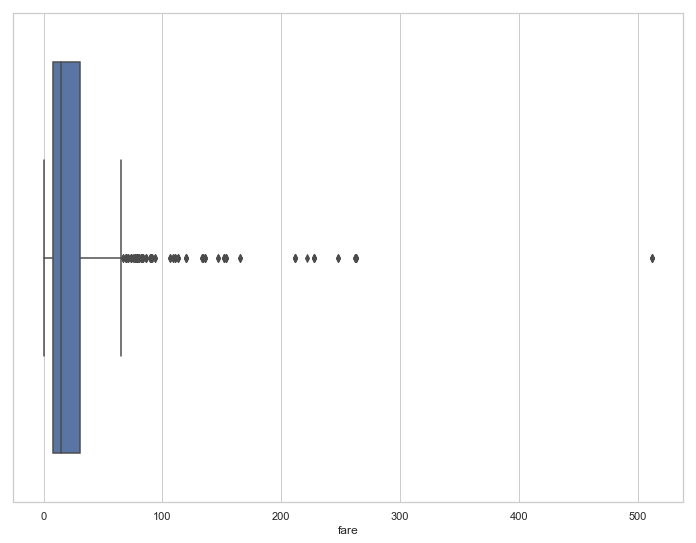

In [6]:
# 4th of 4 single variable plots

plt.figure(figsize=(12,9))
sns.set(style='whitegrid')
ax = sns.boxplot(x=titanic.fare)

If you need to plot one variable, a boxplot is a great way to go.  You can see where the minimum, mean, and maximum values, as well as any outliers quickly and easily in a glance.

<Figure size 1080x864 with 0 Axes>

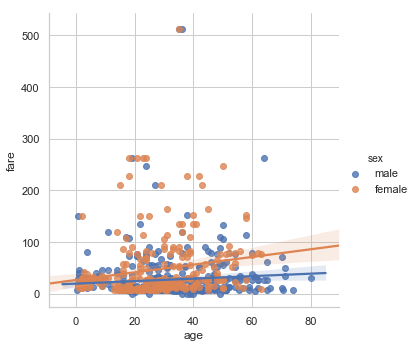

In [7]:
# Two continuous variables, and plot them three different ways
# Two continuous variables =>  Fare and Age
# 1st of 3 continuous variable plots
plt.figure(figsize=(15,12))
g = sns.lmplot(x="age", y="fare", hue='sex',data=titanic)

Scatterplots are great for showing relationships and though the bottom is a little busy, you can tell that fares priced under $100 were more frequently bought in all age groups than fares over $100.  Outliers are easy to see and everything is understood in a glance.

<Figure size 864x648 with 0 Axes>

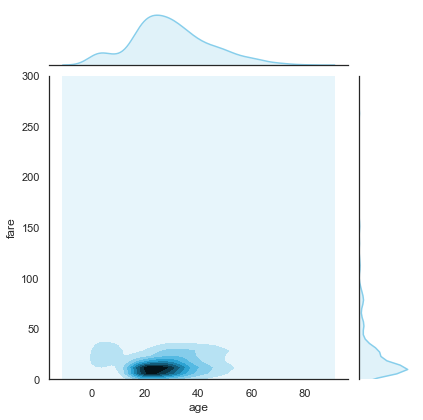

In [8]:
# 2nd of 3 continuous variable plots
plt.figure(figsize=(12,9))
sns.set(style="white", color_codes=True)
sns.jointplot(x=titanic.age, y=titanic.fare,
                   kind='kde', color="skyblue")
plt.xlim(0,)
plt.ylim(0,300)
plt.show()

While this jointplot is really interesting to look at, much is lost in the translation.  It really only shows the main group of fares and any outliers or fares that are not in a large group are not even shown.  Perhaps a larger dataset that has more spread would give this type of plotting an advantage.  

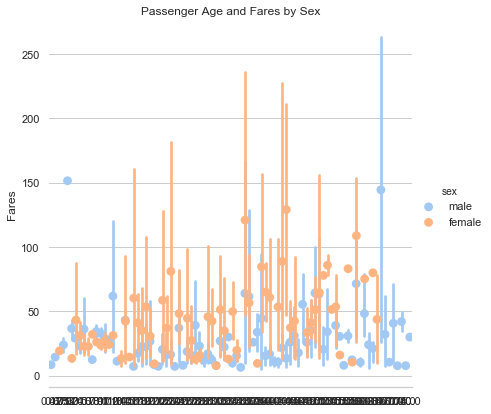

In [17]:
# 3rd of 3 continuous variable plots
sns.set(style='whitegrid')

g = sns.catplot(x='age', y='fare', hue='sex', data=titanic,
                  height=6, kind='point',
                  palette='pastel', ci=95, dodge=True, join=False)
g.despine(left=True)
g.set_ylabels('Fares')
g.set_xlabels('')
plt.title('Passenger Age and Fares by Sex')
plt.show()

This pointplot is kind of interesting with the confidence interval lines. However the x axis needs to be consolidated into groupings to be able to see the ages.  Not very helpful as it is currently.

#### As an optional challenge, find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:

* Probability distributions
* Bivariate relationships
* Whether the distributions or the relationships vary across groups

Accompany your plot with a written description of what you see.

In [22]:
iris = sns.load_dataset("iris")
print(iris.head(n=4))

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa


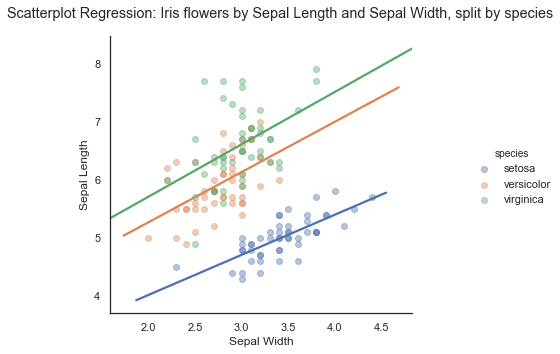

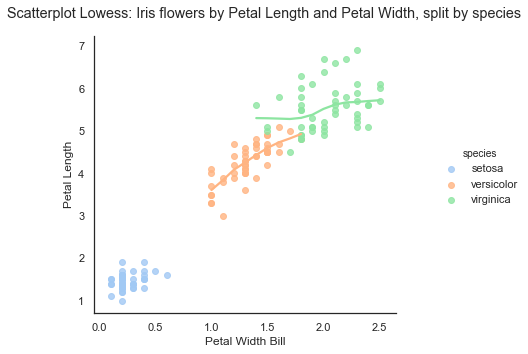

In [25]:
# Setting the overall aesthetic.
sns.set(style="white")

g = sns.lmplot(y='sepal_length', 
               x='sepal_width',
               hue='species',
               data=iris, # Data.
               fit_reg=True,
               ci=False,
               scatter_kws={'alpha':0.4})
g.set_ylabels("Sepal Length")
g.set_xlabels("Sepal Width")
plt.suptitle('Scatterplot Regression: Iris flowers by Sepal Length and Sepal Width, split by species')
plt.subplots_adjust(top=0.9)
plt.show()

g = sns.lmplot(y='petal_length', 
               x='petal_width',
               hue='species',
               data=iris, # Data.
               fit_reg=True, 
               ci=False, 
               palette='pastel',
               lowess=True) # Using local weighing to fit a line.
g.set_ylabels("Petal Length")
g.set_xlabels("Petal Width Bill")
plt.suptitle('Scatterplot Lowess: Iris flowers by Petal Length and Petal Width, split by species')
plt.subplots_adjust(top=0.9)
plt.show()

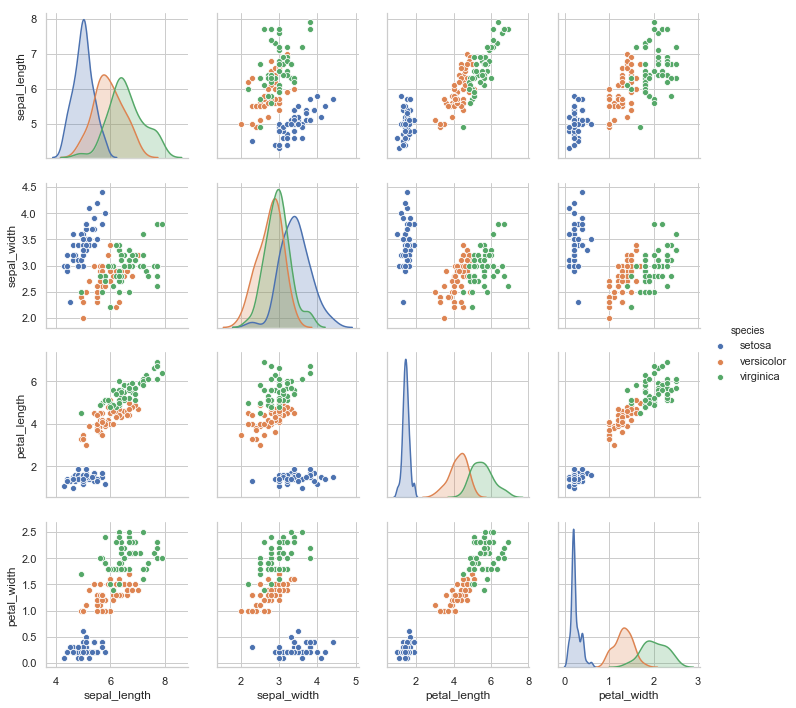

In [32]:
sns.pairplot(iris, hue="species", height=2.5);

Looking at the different ways the Iris flowers are plotted gives a good variety of ways to see the data.  While this is a great way to present a dataset, it can be hard on the eyes to follow the axes measures at the left and bottom to the opposite side.  However having the species as color coded categories does allow understanding without knowing the exact numbers for the axes.

Quick observations:
* The Setosa species has the largest sepal length and separl width.
* The Virginica species has the largest petal length and petal width.
* The Versicolor species is neither the largest or smallest of any of the variables, but tends to be in the middle between the other species.s

In [28]:
# Did this dataset to see difference in types of data and how it falls
# on the pairplot.  Just to satisfy my curiousity.
diamonds = sns.load_dataset("diamonds")
print(diamonds.head(n=4))

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63


In [29]:
diamset = diamonds[['carat','cut','clarity','depth','table','price']]
print(diamset.head(n=4))

   carat      cut clarity  depth  table  price
0   0.23    Ideal     SI2   61.5   55.0    326
1   0.21  Premium     SI1   59.8   61.0    326
2   0.23     Good     VS1   56.9   65.0    327
3   0.29  Premium     VS2   62.4   58.0    334


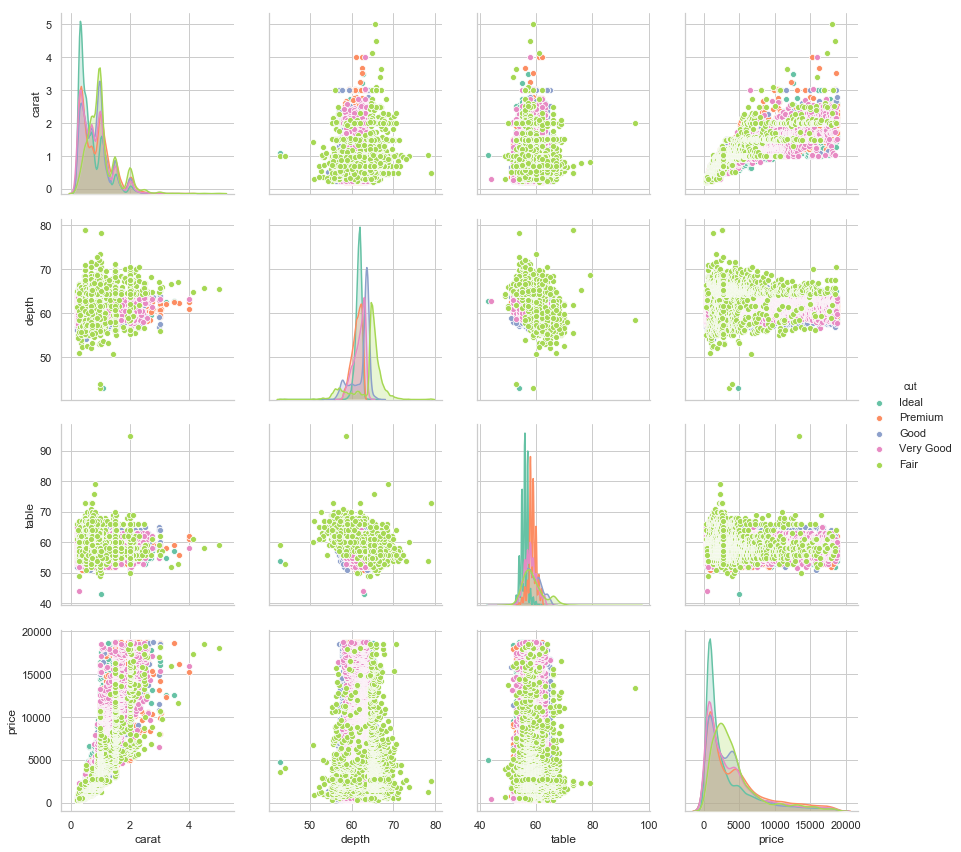

In [31]:
g = sns.pairplot(diamset, hue='cut',palette='Set2',
                 diag_kind='kde', height=3)